# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = pd.read_excel('German_Credit.xlsx')

# 2. Check how many records do we have


In [8]:
data.shape
data.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 3. Plot Histogram for column 'CreditAmount'

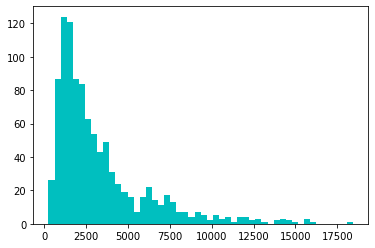

In [9]:
credit_amount = data['CreditAmount']
plt.hist(data['CreditAmount'],bins=50, color='C')
plt.show()

# 4. Convert 'CreditAmount' into a categorical feature by grouping with start and end of interval as:
-  (0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000)

In [10]:
credit_amount_labels = ['0-500', '501-1000','1001-1500', '1501-2000', '2001-2500', '2501-5000', '5001-7500', '7501-10000', '10001-15000', '15001-20000']
bin_edges = [0, 500, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000]
data['CreditAmount'] = pd.cut(data['CreditAmount'], bins=bin_edges, labels =credit_amount_labels)
data['CreditAmount']

0        1001-1500
1        2501-5000
2         501-1000
3        2001-2500
4        2001-2500
5        2001-2500
6        2501-5000
7        1001-1500
8        1001-1500
9        2501-5000
10       2501-5000
11       5001-7500
12       1501-2000
13      7501-10000
14       1501-2000
15       2501-5000
16       2501-5000
17       2501-5000
18       2001-2500
19       5001-7500
20       2501-5000
21       2501-5000
22       2001-2500
23       1001-1500
24       2501-5000
25       2501-5000
26        501-1000
27       1001-1500
28       2501-5000
29       2501-5000
          ...     
970      2501-5000
971     7501-10000
972      2001-2500
973    10001-15000
974          0-500
975    10001-15000
976    15001-20000
977    10001-15000
978      2501-5000
979      2501-5000
980      2001-2500
981      2001-2500
982      5001-7500
983      1501-2000
984      5001-7500
985      2001-2500
986     7501-10000
987       501-1000
988       501-1000
989      2501-5000
990       501-1000
991    10001

# 5. Create histogram to represent count of different 'Creditability' under each group of 'CreditAmount'

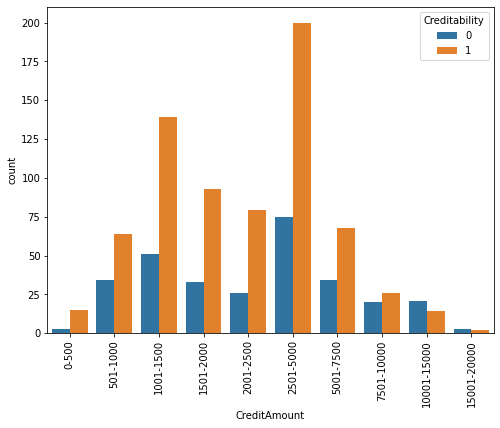

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x ='CreditAmount', data=data, hue='Creditability')
plt.xticks(rotation=90)
plt.show()

# 6. Find out total number Creditability in each interval of CreditAmount

In [12]:
data.groupby('CreditAmount')['Creditability'].count()

CreditAmount
0-500           18
501-1000        98
1001-1500      190
1501-2000      126
2001-2500      105
2501-5000      275
5001-7500      102
7501-10000      46
10001-15000     35
15001-20000      5
Name: Creditability, dtype: int64

# 7. Find out total number of Creditability where Creditability is '0' and Creditability is '1' in each interval of CreditAmount

In [13]:
pd.crosstab(data['CreditAmount'],data['Creditability'])

Creditability,0,1
CreditAmount,,
0-500,3,15
501-1000,34,64
1001-1500,51,139
1501-2000,33,93
2001-2500,26,79
2501-5000,75,200
5001-7500,34,68
7501-10000,20,26
10001-15000,21,14


# 8. Prepare input data for the model

In [14]:
data['CreditAmount'].unique()


[1001-1500, 2501-5000, 501-1000, 2001-2500, 5001-7500, 1501-2000, 7501-10000, 0-500, 10001-15000, 15001-20000]
Categories (10, object): [0-500 < 501-1000 < 1001-1500 < 1501-2000 ... 5001-7500 < 7501-10000 < 10001-15000 < 15001-20000]

In [15]:
data['CreditAmount'] = data['CreditAmount'].cat.codes


In [16]:
data['CreditAmount'].unique()

array([2, 5, 1, 4, 6, 3, 7, 0, 8, 9])

In [17]:
X = data.drop('Creditability', axis=1)
Y = data.Creditability.astype('category')

# 9. Fit logistic regression model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train.head()
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
model_score = model.score(x_test, y_test)
print(model_score)

0         1  intercept
0  0.138183 -0.051702    1.45153
0.6933333333333334


# 10. Test accuracy calculation

In [22]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = model.predict(x_test)
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.7 as values at and above 0.7 probability is converted to '1'

y_pred_df[0:5]

,actual,predicted_prob,predicted
521,0,1,1
737,1,1,1
740,1,1,1
660,1,1,1
411,1,1,1


# 11. Build a confusion matrix

# 12.  Predicted Probability distribution Plots for Defaults and Non Defaults